In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/4E2project/

Mounted at /content/drive
/content/drive/MyDrive/4E2project


In [ ]:
import librosa as librosa
import numpy as np
import sys
sys.set_int_max_str_digits(0)
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%matplotlib inline
import librosa.display
from IPython.display import Audio
import pandas as pd
import os
from sklearn.model_selection import train_test_split
#import splitfolders
import skimage.io
!pip install audiomentations[extras]
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, RoomSimulator
!pip install pyroomacoustics
import pyroomacoustics as pra
import pyroomacoustics.acoustics as pra1


def nextpow2(N):

    # Calculate log2 of N
    a = int(math.log2(N))

    # If 2^a is equal to N, return N
    if 2**a == N:
        return N

    # Return 2^(a + 1)
    return 2**(a + 1)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.8/239.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for cylimiter: filename=cylimiter-0.3.0-cp310-cp310-linux_x86_64.whl size=421751 sha256=0fa54bc7d63798ae62ba308bf138f54e22c78af1133ee557702316d3b39d7b4f
  Stored in directory: /root/.cache/pip/wheels/5c/03/ae/495ebd9cc7fe65bcb6474b5299a3db1e144b6bf1bf56b1c913
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.7.3-cp310-cp310-linux_x86_64.whl size=11909853 sha256=3849b4d51b25403df6e1b1c4a1c41c15a285b5b27c323d640d

In [ ]:
import scipy
from posix import fspath
filename2 = '052__[voi][nod][cou_fol]2396__1'
filename = f'IRMAS-TrainingData/voi/{filename2}'
Irmas_audio = ['cel','cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi']
length = len(Irmas_audio)
import random
fs = 44100

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra
import soundfile as sf

for i in range(length):

  directory = os.fsencode(f'IRMAS-TrainingData/{Irmas_audio[i]}')
  #os.makedirs(f'AugmentedAudio(noreverb)/{Irmas_audio[i]}')

  for file in os.listdir(directory):
      filename = os.fsdecode(file)
      y, sr = librosa.load(f'IRMAS-TrainingData/{Irmas_audio[i]}/{filename}', sr = fs)
      signal = librosa.to_mono(y)
      yshift = librosa.effects.pitch_shift(y = signal, sr = sr, n_steps = random.randrange(-2, 5), bins_per_octave=12, res_type='soxr_hq', scale=False)
      yslow = librosa.effects.time_stretch(yshift, rate=0.5)
      signal = yshift
      fs = sr
      filename2 = os.path.basename(filename).split('.')[0]
      corners = np.array([[0,0], [0,10], [20,10], [20,0]]).T  # [x,y]
      room = pra.Room.from_corners(corners)

      room = pra.Room.from_corners(corners)
      room.extrude(8.)

      # add source to 2D room

      room = pra.Room.from_corners(corners, fs=fs, ray_tracing=True, air_absorption=True)
      room.add_source([5.,5.], signal=signal)

      R = pra.circular_2D_array(center=[15.,5.], M=6, phi0=0, radius=0.1)
      room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

      # set max_order to a low value for a quick (but less accurate) RIR
      room = pra.Room.from_corners(corners, fs=fs, max_order=3, materials=pra.Material(0.2, 0.15), ray_tracing=True, air_absorption=True)
      room.extrude(8., materials=pra.Material(0.2, 0.15))

      # Set the ray tracing parameters
      room.set_ray_tracing(receiver_radius=0.5, n_rays=10000, energy_thres=1e-5)

      # add source and set the signal to WAV file content
      room.add_source([5., 5., 2.], signal=signal)

      # add two-microphone array
      R = np.array([15., 5., 5.])  # [[x], [y], [z]]
      room.add_microphone(R)

      # compute image sources
      room.image_source_model()
      room.simulate()


      #sound = room.mic_array.signals[0,:]
#
    #
      sf.write(f'AugmentedAudio(noreverb)/{Irmas_audio[i]}/{filename2}(A1).wav', data = yslow[0 : 3*fs], samplerate = fs, subtype='PCM_24')
      sf.write(f'AugmentedAudio(noreverb)/{Irmas_audio[i]}/{filename2}(A2).wav', data = yslow[3*fs : 6*fs], samplerate = fs, subtype='PCM_24')

  print(f'{Irmas_audio[i]} augmentation is complete')

print(' all augmentation is complete')












In [ ]:
print(split[0])
print(y)
print()

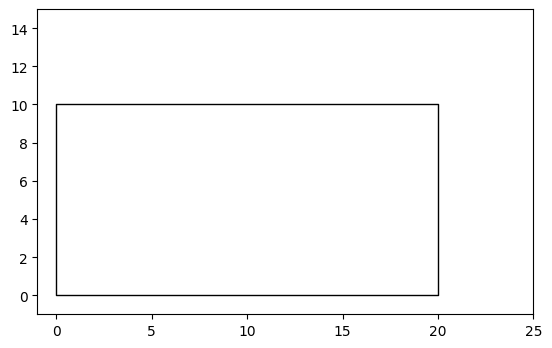

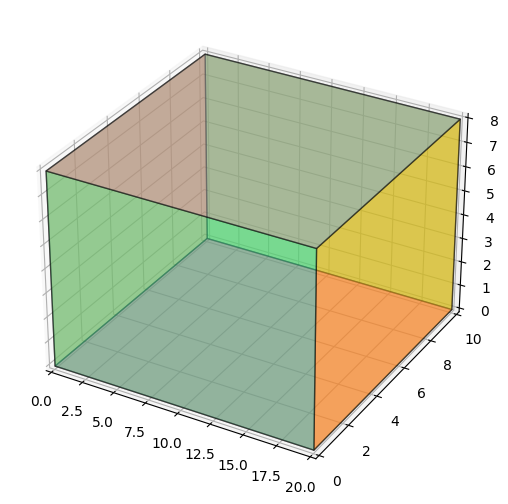

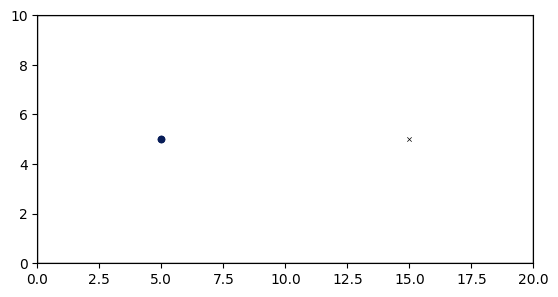

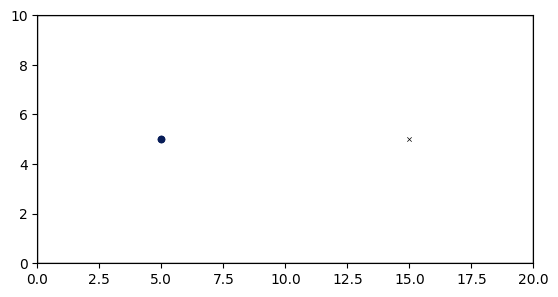

The RT60 is 1125 ms
(1, 205772)


<Figure size 640x480 with 0 Axes>

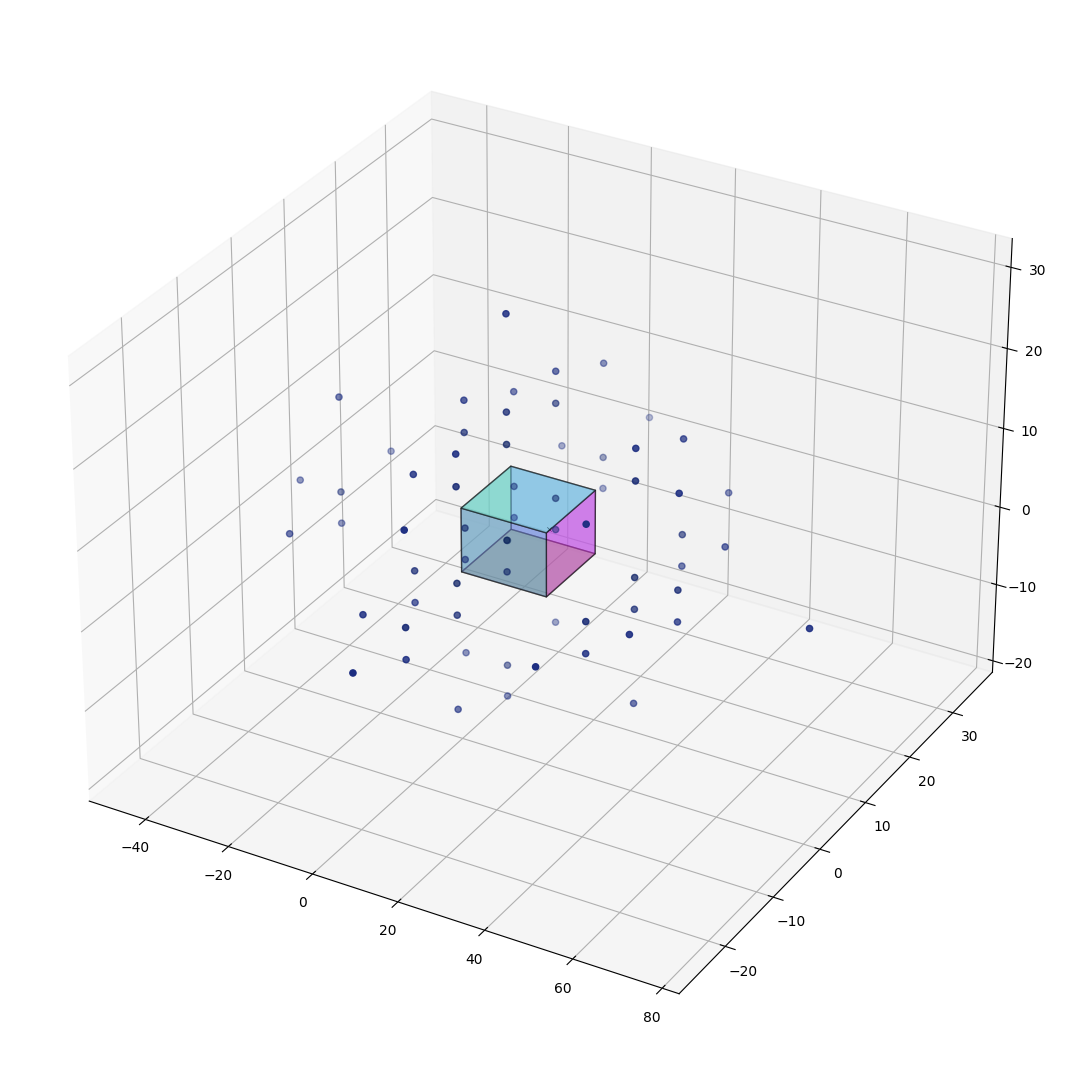

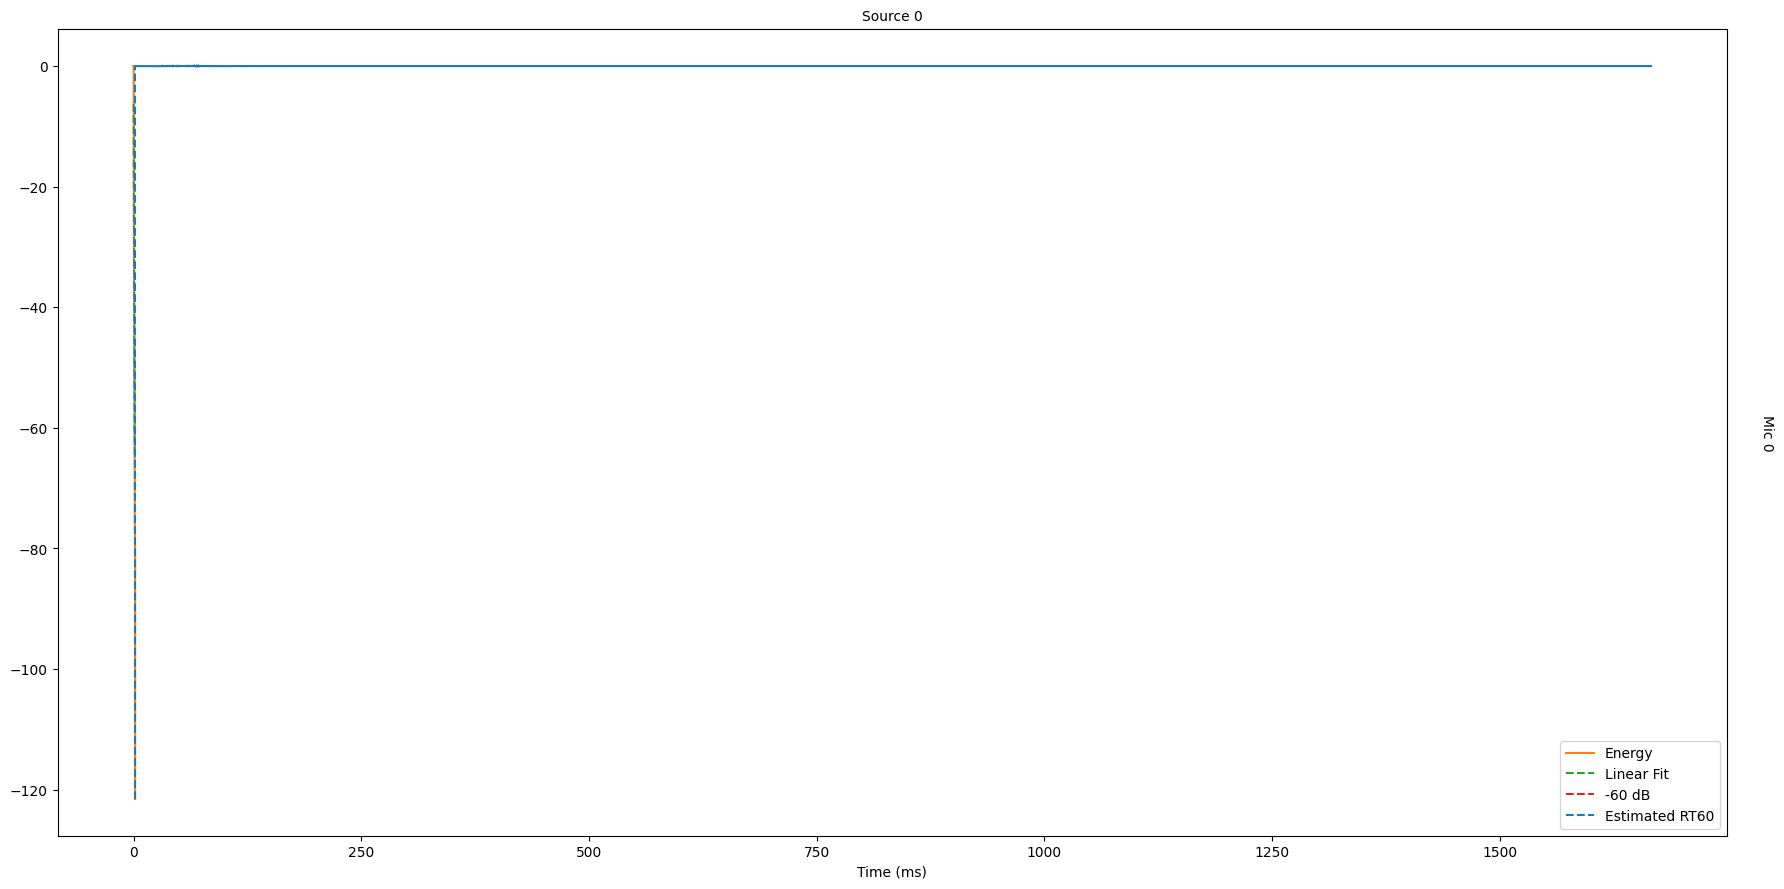

In [ ]:
filename2 = '[gel][pop_roc]1020__2'
filename = f'IRMAS-TrainingData/gel/{filename2}'
y, sr = librosa.load(f'{filename}.wav', sr = 44100)
fs = sr
signal = y
corners = np.array([[0,0], [0,10], [20,10], [20,0]]).T  # [x,y]
room = pra.Room.from_corners(corners)

fig, ax = room.plot()
ax.set_xlim([-1, 25])
ax.set_ylim([-1, 15]);

room = pra.Room.from_corners(corners)
room.extrude(8.)

fig, ax = room.plot()
ax.set_xlim([0, 20])
ax.set_ylim([0, 10])
ax.set_zlim([0, 8]);

# add source to 2D room

room = pra.Room.from_corners(corners, fs=fs, ray_tracing=True, air_absorption=True)
room.add_source([5.,5.], signal=signal)
R = np.array([15, 5.])  # [[x], [y], [z]]
room.add_microphone(R)

fig, ax = room.plot()

R = pra.circular_2D_array(center=[15.,5.], M=6, phi0=0, radius=0.1)
room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

fig, ax = room.plot()
plt.savefig(f'2droom.png', dpi = 300)


plt.show()

# set max_order to a low value for a quick (but less accurate) RIR
room = pra.Room.from_corners(corners, fs=fs, max_order=3, materials=pra.Material(0.2, 0.15), ray_tracing=True, air_absorption=True)
room.extrude(8., materials=pra.Material(0.2, 0.15))
plt.savefig(f'3droom.png', dpi = 300)

# Set the ray tracing parameters
room.set_ray_tracing(receiver_radius=0.5, n_rays=10000, energy_thres=1e-5)

# add source and set the signal to WAV file content
room.add_source([5., 5, 2.], signal=signal)

# add two-microphone array
R = np.array([15, 5., 5.])  # [[x], [y], [z]]
room.add_microphone(R)

# compute image sources
room.image_source_model()

# visualize 3D polyhedron room and image sources
fig, ax = room.plot(img_order=3)
fig.set_size_inches(18.5, 10.5)
plt.savefig(f'polyhedronroom.png', dpi = 300)



room.plot_rir()
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.savefig(f'RIR_response.png', dpi = 300)



t60 = pra.experimental.measure_rt60(room.rir[0][0], fs=room.fs, plot=True)
print(f"The RT60 is {t60 * 1000:.0f} ms")



room.simulate()
print(room.mic_array.signals.shape)

In [ ]:

print("Original WAV:")
display(Audio(signal, rate=fs))

Original WAV:


In [ ]:
#yshift = librosa.effects.pitch_shift(y = room.mic_array.signals[0,:], sr = sr, n_steps = 5, bins_per_octave=12, res_type='soxr_hq', scale=False)
yslow = librosa.effects.time_stretch(y = room.mic_array.signals[0,:], rate=0.5)
print("Simulated propagation to first mic:")
display(Audio(yslow, rate = fs))
sound = room.mic_array.signals[0,:]
display(Audio(sound, rate=fs))


Simulated propagation to first mic:


**LOADING THE FILE**

8192


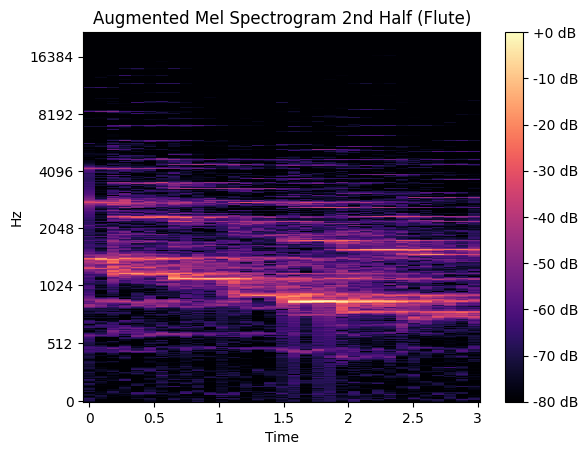

In [ ]:
librosa.effects.split(yslow, top_db=5, frame_length=2048, hop_length=512)

segment_dur_secs = 3
segment_length = sr * segment_dur_secs

num_sections = int(np.ceil(len(yslow) / segment_length))

split = []

for i in range(num_sections):
    t = yslow[i * segment_length: (i + 1) * segment_length]
    split.append(t)
desired_window_duration = 0.1
fs = 44100
#winow length is dictated by our duration and the sampling rate
window_length = (nextpow2(round(desired_window_duration * fs)));
print(window_length)
#the overlap is currently set to 50% of the window length which is standard. Changing to 75% is also quite standardised
fig, ax0 = plt.subplots()
overlap = round(window_length / 2);
D_highres = librosa.stft(split[1], hop_length=overlap, n_fft=window_length, window='hamming')
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
bins = 1024
#plt.axis('off')  # no axis
#plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
M = librosa.feature.melspectrogram(y=split[1], sr = fs, hop_length=overlap, n_fft= window_length, window='hamming', n_mels = bins)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax0, sr = fs, n_fft=window_length, hop_length = overlap)
ax0.set(title='Augmented Mel Spectrogram 2nd Half (Flute)')
fig.colorbar(img, ax=ax0, format="%+2.f dB")
plt.savefig('augmentedspectrogram.png', dpi = 300)


display(Audio(data=split[0], rate=fs))
display(Audio(data=split[1], rate=fs))

# **THIS IS LIBROSA CODE FOR LOOKING AT TRANSIENT MARKERS/DISTINCT CHANGES IN AMPLITUDE**

In [ ]:
import matplotlib.pyplot as plt

librosa.onset.onset_detect(y=y, sr=fs, units='time')

D = np.abs(librosa.stft(y))

fig, ax = plt.subplots(nrows=2, sharex=True)

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),

                         x_axis='time', y_axis='log', ax=ax[0], sr = fs)

ax[0].set(title='Power spectrogram')

ax[0].label_outer()

o_env = librosa.onset.onset_strength(y=y, sr=fs)

times = librosa.times_like(o_env, sr=fs)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=fs)


ax[1].plot(times, o_env, label='Onset strength')

ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,

           linestyle='--', label='Onsets')

ax[1].legend()

## **CODE for creating spectorgrams of differing settings to analyze for each instrument.**

In [ ]:
import math
def nextpow2(N):

    # Calculate log2 of N
    a = int(math.log2(N))

    # If 2^a is equal to N, return N
    if 2**a == N:
        return N

    # Return 2^(a + 1)
    return 2**(a + 1)
fs = 44100

window_length = (nextpow2(round(0.1 * fs)));
print(window_length)

8192


In [ ]:
filename3 = os.path.basename(filename2).split('.')[0]
#change through 0.05, 0.1, 0.25, 0.5
desired_window_duration = [0.05, 0.1, 0.25, 0.5];
for i in desired_window_duration:
  #winow length is dictated by our duration and the sampling rate
  window_length = (nextpow2(round(i * fs)));
  #the overlap is currently set to 50% of the window length which is standard. Changing to 25% is also quite standardised
  overlap = [round(window_length/2), round(window_length/3*2)];
  for j in overlap:
    #change through 128, 256, 512, 1024, 2048
    bins = [128, 256, 512, 1024, 2048]
    for k in bins:
      #change through hamming, hanning, blackman
      wndw = ['blackman', 'bartlett', 'hann', 'hamming']
      for l in wndw: #looping through each window
        fig, ax = plt.subplots()
        M = librosa.feature.melspectrogram(y=y, sr=fs, hop_length=j, n_fft=window_length, window=l, center = True, n_mels = k)
        print("number of frequency bins:", k)
        print("window duration: ", i, "s")
        print("overlap = half")
        M_db = librosa.power_to_db(M, ref=np.max)
        img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax, sr = fs, n_fft= window_length, hop_length = j)
        ax.set(title=f'Mel spectrogram display,fs:{fs},wndwl:{i},overlap:{j},no_bins:{k},w_type:{l}')
        fig.colorbar(img, ax=ax, format="%+2.f dB")
        fig.savefig(f'Spectrograms/voi/{filename3},fs:{fs},wndwl:{i},overlap:{j},no_bins:{k},w_type:{l}.png', dpi = 300)

# **FOR CONVERTING FULL FOLDER TO SPECTROGRAMS**

In [ ]:
Irmas_audio = ['cel','cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi']
fs = 44100
desired_window_duration = 0.05;
length = len(Irmas_audio)

for i in range(length):

  directory = os.fsencode(f'AugmentedAudio(nostretch)/{Irmas_audio[i]}')
  os.makedirs(f'Spectrograms/{Irmas_audio[i]}/augmentednostretch(newsettings2)')

  for file in os.listdir(directory):
      filename = os.fsdecode(file)
      y, sr = librosa.load(f'AugmentedAudio(nostretch)/{Irmas_audio[i]}/{filename}', sr = fs)
      D = librosa.stft(y)  # STFT of y
      S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

      filename2 = os.path.basename(filename).split('.')[0]

      fig, ax = plt.subplots()
      #winow length is dictated by our duration and the sampling rate
      window_length = (nextpow2(round(desired_window_duration * fs)));
      #the overlap is currently set to 50% of the window length which is standard. Changing to 75% is also quite standardised
      overlap = round(window_length / 2);
      D_highres = librosa.stft(y, hop_length=overlap, n_fft=window_length, window='blackman')
      S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
      bins = 256
      plt.axis('off')  # no axis
      plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
      M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=overlap, n_fft=window_length, window='blackman', n_mels = bins)
      M_db = librosa.power_to_db(M, ref=np.max)
      img = librosa.display.specshow(M_db, sr = fs, n_fft= window_length, hop_length = overlap)
      plt.savefig(f'Spectrograms/{Irmas_audio[i]}/augmentednostretch(newsettings2)/{filename2}(mel).png', dpi = 300)

  print(f"{Irmas_audio[i]} done")




TO MOVE 50 RANDOM SPECTROGRAMS FROM GOOD FOLDER TO TRAINSMALL FOLDER


In [ ]:
import os
import random
import shutil
Irmas_audio = ['cel','cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi']
length = len(Irmas_audio)

for i in range(length):
  #os.makedirs(f'Spectrograms/{Irmas_audio[i]}/all+augmented(nostretchnew2)')
  source = f'Spectrograms/{Irmas_audio[i]}/augmentednostretch(newsettings2)'
  dest = f'Spectrograms/{Irmas_audio[i]}/all+augmented(nostretchnew2)'
  files = os.listdir(source)
  no_of_files = len(files)

  for file_name in random.sample(files, no_of_files):
    shutil.copy(os.path.join(source, file_name), os.path.join(dest, "A-" + file_name))
  print(f'{Irmas_audio[i]} done')

cel done
cla done
flu done
gac done
gel done
org done
pia done
sax done
tru done
vio done
voi done


# **For TRAINING THE MODEL FOR CLASSIFICATION**

In [ ]:
# Import the necessary modules

import tensorflow as tf

import keras
from keras import datasets
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization, Concatenate
from keras.layers import PReLU, LeakyReLU, Conv2D, MaxPool2D, Lambda
from keras.regularizers import l2

from keras.models import model_from_json

from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

import pickle
import sklearn as skl

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score


In [ ]:
# Define some useful functions
class PlotLossAccuracy(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.acc = []
        self.losses = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(int(self.i))
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

        self.i += 1

        clear_output(wait=True)
        plt.figure(figsize=(16, 6))
        plt.plot([1, 2])
        plt.subplot(121)
        plt.plot(self.x, self.losses, label="train loss")
        plt.plot(self.x, self.val_losses, label="validation loss")
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.title('Model Loss')
        plt.legend()
        plt.subplot(122)
        plt.plot(self.x, self.acc, label="training accuracy")
        plt.plot(self.x, self.val_acc, label="validation accuracy")
        plt.legend()
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.title('Model Accuracy')
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.show();


In [ ]:
# Function to save a model
def save_model_to_disk(model, filename_base):
    # save model and weights (don't change the filenames)
    model_json = model.to_json()
    with open(filename_base + ".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(f"{filename_base}.h5")
    print("Saved model to model.json and weights to model.h5")

# **CONVERTING FOLDERS TO .NPY files**

In [ ]:
from numpy.core.multiarray import array
import glob
import numpy as np
from PIL import Image
import os

inputcel = []
inputcla = []
inputflu = []
inputgac = []
inputgel = []
inputorg = []
inputpia = []
inputsax = []
inputtru = []
inputvio = []
inputvoi = []

classes = [inputcel, inputcla, inputflu, inputgac, inputgel, inputorg, inputpia, inputsax, inputtru, inputvio, inputvoi]

Irmas_audio = ['cel','cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru','vio', 'voi']
length = len(Irmas_audio)
fs = 44100
desired_window_duration = 0.1;

for i in range(length):

  directory = os.fsencode(f'Spectrograms/{Irmas_audio[i]}/all+augmented(nostretchnew2)')

  for file in os.listdir(directory):
      filename = os.fsdecode(file)
      image = Image.open(f'Spectrograms/{Irmas_audio[i]}/all+augmented(nostretchnew2)/{filename}').convert('RGB')
      image = np.array(image)
      image = tf.image.resize(image , size=(144, 192))
      classes[i].append(image)
  print(f'{Irmas_audio[i]} size: {np.array(classes[i]).shape}')
  np.save(f"({Irmas_audio[i]})all+augmented(nostretchnew).npy",np.array(classes[i]))




cel size: (776, 144, 192, 3)
cla size: (1010, 144, 192, 3)
flu size: (902, 144, 192, 3)
gac size: (1274, 144, 192, 3)
gel size: (1520, 144, 192, 3)
org size: (1364, 144, 192, 3)
pia size: (1442, 144, 192, 3)
sax size: (1252, 144, 192, 3)
tru size: (1154, 144, 192, 3)
vio size: (1160, 144, 192, 3)
voi size: (1556, 144, 192, 3)


In [ ]:
drive.flush_and_unmount()

## **TRAINING**

In [ ]:
from numpy.core.multiarray import array

inputcel = np.load(f'(cel)all+augmented(noshiftnew).npy')
inputcla = np.load(f'(cla)all+augmented(noshiftnew).npy')
inputflu = np.load(f'(flu)all+augmented(noshiftnew).npy')
inputgac = np.load(f'(gac)all+augmented(noshiftnew).npy')
inputgel = np.load(f'(gel)all+augmented(noshiftnew).npy')
inputorg = np.load(f'(org)all+augmented(noshiftnew).npy')
inputpia = np.load(f'(pia)all+augmented(noshiftnew).npy')
inputsax = np.load(f'(sax)all+augmented(noshiftnew).npy')
inputtru = np.load(f'(tru)all+augmented(noshiftnew).npy')
inputvio = np.load(f'(vio)all+augmented(noshiftnew).npy')
inputvoi = np.load(f'(voi)all+augmented(noshiftnew).npy')


X = np.concatenate([inputcel, inputcla, inputflu, inputgac, inputgel, inputorg, inputpia, inputsax, inputtru,
                    inputvio, inputvoi])

a = np.full(len(inputcel), 0)
b = np.full(len(inputcla), 1)
c = np.full(len(inputflu), 2)
d = np.full(len(inputgac), 3)
e = np.full(len(inputgel), 4)
f = np.full(len(inputorg), 5)
g = np.full(len(inputpia), 6)
h = np.full(len(inputsax), 7)
i = np.full(len(inputtru), 8)
j = np.full(len(inputvio), 9)
k = np.full(len(inputvoi), 10)
Y = np.concatenate([a, b, c, d, e, f, g, h, i, j, k])
Y = tf.keras.utils.to_categorical(Y)

In [ ]:
from numpy.core.multiarray import array

inputcel = np.load(f'(cel)all.npy')
inputcla = np.load(f'(cla)all.npy')
inputflu = np.load(f'(flu)all.npy')
inputgac = np.load(f'(gac)all.npy')
inputgel = np.load(f'(gel)all.npy')
inputorg = np.load(f'(org)all.npy')
inputpia = np.load(f'(pia)all.npy')
inputsax = np.load(f'(sax)all.npy')
inputtru = np.load(f'(tru)all.npy')
inputvio = np.load(f'(vio)all.npy')
inputvoi = np.load(f'(voi)all.npy')


X = np.concatenate([inputcel, inputcla, inputflu, inputgac, inputgel, inputorg, inputpia, inputsax, inputtru,
                    inputvio, inputvoi])

a = np.full(len(inputcel), 0)
b = np.full(len(inputcla), 1)
c = np.full(len(inputflu), 2)
d = np.full(len(inputgac), 3)
e = np.full(len(inputgel), 4)
f = np.full(len(inputorg), 5)
g = np.full(len(inputpia), 6)
h = np.full(len(inputsax), 7)
i = np.full(len(inputtru), 8)
j = np.full(len(inputvio), 9)
k = np.full(len(inputvoi), 10)
Y = np.concatenate([a, b, c, d, e, f, g, h, i, j, k])
Y = tf.keras.utils.to_categorical(Y)

In [ ]:
# let's split data between validation set and training set

X_train, X_test, Y_train, Y_test = skl.model_selection.train_test_split(X, Y, test_size=.2, shuffle = True)
#X_train, X_validation, Y_train, Y_validation = skl.model_selection.train_test_split(X, Y, test_size=.1)

In [ ]:

# The model below contains 2 hidden layers with 64 nodes each.
# The activation functions for these 2 layers is the ReLU
# The network ends with a 10 nodes layer with softmax activation
# The first 2 hidden layers transform the original features into
# a new feature vector of size 64.
# The last layer essentially does the classification using multonomial regression
# based on these new features.
import math
import cv2
from keras import regularizers



inputs = keras.layers.Input(shape=(144, 192, 3))

x = keras.applications.VGG19(weights = 'imagenet', include_top = False, input_shape = (144, 192, 3))(inputs)



x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.L2(0.01),
    bias_regularizer=regularizers.L2(0.01),
    activity_regularizer=regularizers.L2(0.01))(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.L2(0.01),
    bias_regularizer=regularizers.L2(0.01),
    activity_regularizer=regularizers.L2(0.01))(x)
predictions = Dense(11, activation='softmax')(x)  # There are 10 classes in this problem, hence the '10'.



# Create the model.
model = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.legacy.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name="Adam"
)
from keras import backend as K
#used code from: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def mean_iou(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)

    intersection = K.sum(K.abs(y_true_f * y_pred_f))
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection

    smooth = 1e-5
    iou = (intersection + smooth) / (union + smooth)

    return iou

# Setup the optimisation strategy.
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy', recall_m, precision_m, f1_m])

# Display a summary.
model.summary()




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 144, 192, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 4, 6, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3145984   
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                           

TESTING HGIHER QUALITy

In [ ]:

# The model below contains 2 hidden layers with 64 nodes each.
# The activation functions for these 2 layers is the ReLU
# The network ends with a 10 nodes layer with softmax activation
# The first 2 hidden layers transform the original features into
# a new feature vector of size 64.
# The last layer essentially does the classification using multonomial regression
# based on these new features.
import math
import cv2
from keras import regularizers



inputs = keras.layers.Input(shape=(144, 192, 3))

x = keras.applications.VGG19(weights = 'imagenet', include_top = False, input_shape = (144, 192, 3))(inputs)



x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.L2(0.01),
    bias_regularizer=regularizers.L2(0.01),
    activity_regularizer=regularizers.L2(0.01))(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.L2(0.01),
    bias_regularizer=regularizers.L2(0.01),
    activity_regularizer=regularizers.L2(0.01))(x)
predictions = Dense(11, activation='softmax')(x)  # There are 10 classes in this problem, hence the '10'.



# Create the model.
model = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.legacy.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name="Adam"
)
from keras import backend as K
#used code from: https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def mean_iou(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)

    intersection = K.sum(K.abs(y_true_f * y_pred_f))
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection

    smooth = 1e-5
    iou = (intersection + smooth) / (union + smooth)

    return iou

# Setup the optimisation strategy.
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy', recall_m, precision_m, f1_m])

# Display a summary.
model.summary()




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 144, 192, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 4, 6, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3145984   
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 11)                1419      
                                                                 
Total params: 23204683 (88.52 MB)
Trainable params: 2320468

In [ ]:
#FOR YAMNET

import csv
from IPython.display import Audio
from scipy.io import wavfile
import cv2

import tensorflow_hub as hub


yamnet = hub.load('https://tfhub.dev/google/yamnet/1')


inputs = keras.layers.Input(shape=(144, 192, 3))

x = keras.applications.ResNet50(weights = '', include_top = False, input_shape = (144, 192, 3))(inputs)



x = Flatten()(x)

x = Dense(1024, activation='relu', kernel_regularizer = 'l2', activity_regularizer ='l2')(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu', kernel_regularizer = 'l2', activity_regularizer ='l2')(x)
predictions = Dense(11, activation='softmax')(x)  # There are 10 classes in this problem, hence the '10'.



# Create the model.
model = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.legacy.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name="Adam"
)

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def mean_iou(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)

    intersection = K.sum(K.abs(y_true_f * y_pred_f))
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection

    smooth = 1e-5
    iou = (intersection + smooth) / (union + smooth)

    return iou

# Setup the optimisation strategy.
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy', recall_m, precision_m, f1_m])

# Display a summary.
model.summary()




In [ ]:
#THIS CODE OF VGGish for keras impelmentation was found here
#https://github.com/antoinemrcr/vggish2Keras/blob/master/vggish_keras.py
import math
import cv2



inputs = keras.layers.Input(shape=(144, 192, 3))



x = inputs  # Don't flatten until after your 2D layers

x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv1')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='pool1')(x)
x = BatchNormalization()(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='pool2')(x)
x = BatchNormalization()(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_2')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='pool3')(x)
x = BatchNormalization()(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_2')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='pool4')(x)
x = BatchNormalization()(x)

# Block fc
x = Flatten(name='flatten')(x)
x = Dense(300, activation='relu', kernel_regularizer = 'l2', activity_regularizer ='l2')(x)
predictions = Dense(11, activation='relu', name='fc2')(x)


# Create the model.
model = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.legacy.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name="Adam"
)
# Setup the optimisation strategy.
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display a summary.
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 144, 192, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 144, 192, 64)      1792      
                                                                 
 pool1 (MaxPooling2D)        (None, 72, 96, 64)        0         
                                                                 
 batch_normalization_18 (Ba  (None, 72, 96, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2 (Conv2D)              (None, 72, 96, 128)       73856     
                                                                 
 pool2 (MaxPooling2D)        (None, 36, 48, 128)       0         
                                                           

In [ ]:
# The model below contains 2 hidden layers with 64 nodes each.
# The activation functions for these 2 layers is the ReLU
# The network ends with a 10 nodes layer with softmax activation
# The first 2 hidden layers transform the original features into
# a new feature vector of size 64.
# The last layer essentially does the classification using multonomial regression
# based on these new features.
import math
import cv2



inputs = keras.layers.Input(shape=(144, 192, 3))



x = inputs  # Don't flatten until after your 2D layers
...
x = Conv2D(8, [4, 4], strides=(1, 1), activation='relu', padding = 'valid')(x)
x = Conv2D(8, [4, 4], strides=(1, 1), activation='relu', padding = 'valid')(x)
x = MaxPool2D(pool_size=(2, 2), strides = (2, 2), padding = 'valid')(x)
#x = BatchNormalization()(x)

x = Conv2D(16, [3, 3], strides=(1, 1), activation='relu', padding = 'same')(x)
x = Conv2D(16, [3, 3], strides=(1, 1), activation='relu', padding = 'same')(x)
x = MaxPool2D(pool_size=(2, 2), strides = (2, 2), padding = 'same')(x)
#x = BatchNormalization()(x)

x = Conv2D(32, [2, 2], strides=(1, 1), activation='relu', padding = 'same')(x)
x = Conv2D(32, [2, 2], strides=(1, 1), activation='relu', padding = 'same')(x)
x = MaxPool2D(pool_size=(2, 2), strides = (2, 2), padding = 'same')(x)
#x = BatchNormalization()(x)

# put here some convolutional layers;
# see keras docs for Conv2D, MaxPool2D, etc.
# Maybe stick in some Dropout as well?
x = Flatten()(x)
# The last layers of your model should look something like
# this to be well-structured for the final classification:
... # a few other dense layers?
x = Dense(512, activation='relu', kernel_regularizer = 'l2', activity_regularizer ='l2')(x)
x = Dense(256, activation='relu', kernel_regularizer = 'l2', activity_regularizer ='l2')(x)
predictions = Dense(11, activation='softmax')(x)  # There are 10 classes in this problem, hence the '10'.



# Create the model.
model = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.SGD(
    learning_rate=0.001)
# Setup the optimisation strategy.
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display a summary.
model.summary()




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 144, 192, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 141, 189, 8)       392       
                                                                 
 conv2d_1 (Conv2D)           (None, 138, 186, 8)       1032      
                                                                 
 max_pooling2d (MaxPooling2  (None, 69, 93, 8)         0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 69, 93, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 93, 16)        2320      
                                                           

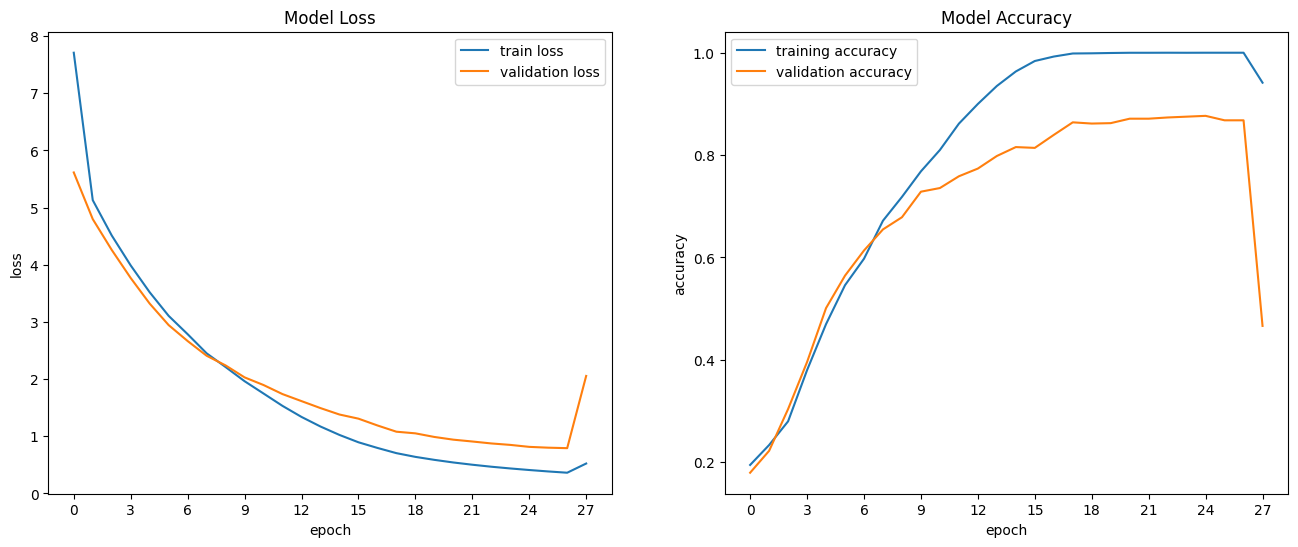

178/178 [==============================] - 95s 534ms/step - loss: 0.5240 - accuracy: 0.9412 - recall_m: 0.9167 - precision_m: 0.9634 - f1_m: 0.9336 - val_loss: 2.0559 - val_accuracy: 0.4663 - val_recall_m: 0.3501 - val_precision_m: 0.5761 - val_f1_m: 0.4343


<Figure size 640x480 with 0 Axes>

In [ ]:

# Note that you can evaluate this cell repeatedly to push the training of your model further.
# You might want to reduce the value of 'num_epochs' if each evaluation starts to take too long.
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

num_epochs = 40
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                              patience=2)

# Create an instance of our callback functions class, to plot our loss function and accuracy with each epoch.
pltCallBack = PlotLossAccuracy()

# Run the training.
model.fit(X_train, Y_train,
          batch_size=64, epochs=num_epochs,
          validation_split=0.1,
          callbacks=[pltCallBack, callback])
plt.savefig(f'Training(VGG19_augementednoshift3rdapril).png', dpi = 300)

In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

In [ ]:
save_model_to_disk(model, "VGG19_model_augmentedallnewsnoshift38thapril")

Saved model to model.json and weights to model.h5


99/99 [==============================] - 15s 110ms/step
Confusion Matrix


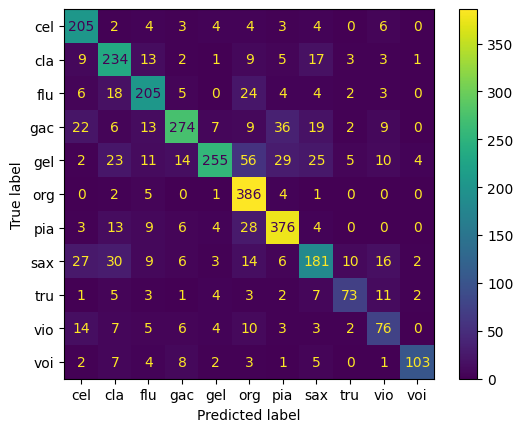

In [ ]:
y_test_arg=np.argmax(Y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
Irmas_audio = ['cel','cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = Irmas_audio)
disp.plot()
plt.savefig(f'cm(VGG19_augmentedallnewsnoshift38thapril2).png', dpi = 300)

In [ ]:
results = model.evaluate(x=X_test, y=Y_test, batch_size=64)
print("test loss, test acc:", results)


50/50 [==============================] - 8s 157ms/step - loss: 1.1231 - accuracy: 0.7498 - recall_m: 0.6603 - precision_m: 0.8388 - f1_m: 0.7380
test loss, test acc: [1.1231189966201782, 0.7498416900634766, 0.6603124737739563, 0.8388034701347351, 0.7380186319351196]


21/21 [==============================] - 2s 92ms/step
Confusion Matrix


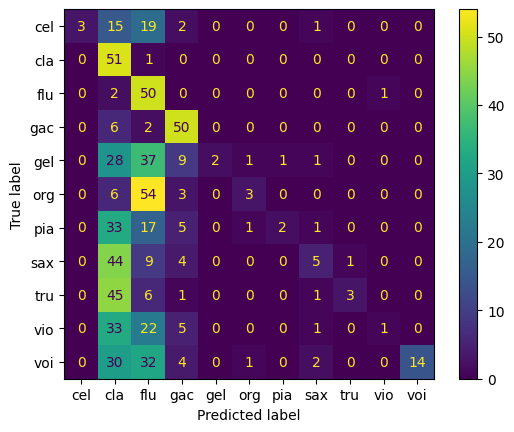

In [ ]:
y_test_arg=np.argmax(Y_validation,axis=1)
Y_pred = np.argmax(model.predict(X_validation),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
Irmas_audio = ['cel','cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = Irmas_audio)
disp.plot()
plt.savefig(f'cm(VGG19_augementwhole3aprilvalidationevaluation).png', dpi = 300)